In [1]:
import numpy as np
from scipy.signal import butter, filtfilt, sosfiltfilt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [3]:
import librosa as lr
import librosa.display

In [4]:
#set directory for source files
data_dir = "C:/Users/lenovo/Desktop/all folders/riya moto/Heart sound dataset/setA"
audio_files = glob(data_dir + '/*.wav')

len(audio_files)

176

In [5]:
#Read in the first audio file, create the time array(timeline)
audio, sfreq = lr.load(audio_files[4])
time = np.arange(0, len(audio))/sfreq
print(audio)
#time

[ 0.00010622  0.00150022  0.00972549 ...  0.01129747  0.00211561
 -0.00151469]


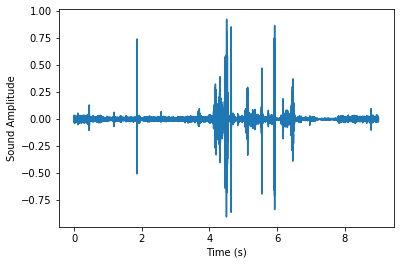

In [6]:
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
plt.show()
audio_one=audio_files[4]

In [7]:
audio, sfreq = lr.load(audio_files[4])
time = np.arange(0, len(audio))/sfreq
print(audio)


import scipy
from scipy import fftpack
audio_fft = scipy.fftpack.fft(audio)
audio_amp = 2 / time.size * np.abs(audio_fft)
audio_freq = np.abs(scipy.fftpack.fftfreq(time.size, 3/1000))

[ 0.00010622  0.00150022  0.00972549 ...  0.01129747  0.00211561
 -0.00151469]


In [8]:
audio_amplitude = pd.Series(audio_amp).nlargest(2).round(0).astype(int).tolist()
print(audio_amp)

[5.7273865e-05 2.2843826e-05 6.8812347e-05 ... 6.6351269e-05 6.8812347e-05
 2.2843826e-05]


[  52.06666667 6562.93333333]


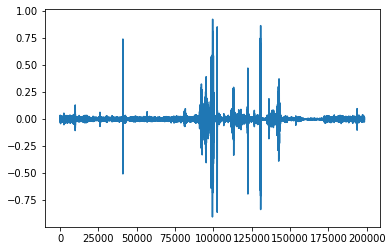

In [9]:
#Calculate Frequency Magnitude
magnitudes = abs(audio_fft[np.where(audio_freq >= 0)])
#Get index of top 2 frequencies
peak_frequency = np.sort((np.argpartition(magnitudes, -2)[-2:])/30)
print(peak_frequency)
plt.plot(audio)

In [10]:
import numpy as np
import plotly.graph_objects as go
from scipy.signal import butter,filtfilt
# Filter requirements.
cutoff = peak_frequency[0]     # desired cutoff frequency of the filter, Hz , slightly higher than actual 2 Hz
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,data)
    return y
# Filter the data, and plot filtered signals.


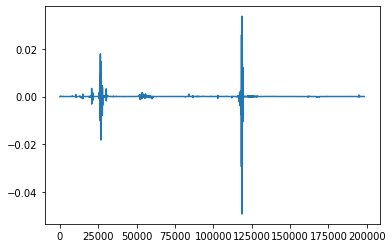

In [11]:
for file in range(0,1):
    audio, sfreq = lr.load(audio_files[file])
    time = np.arange(0, len(audio))/sfreq
    fig, ax = plt.subplots()
    #ax.plot(time, audio)
    #ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
    #plt.show()
    
    # Filter the data, and plot both the original and filtered signals.    
    y = butter_lowpass_filter(audio, peak_frequency[0], sfreq, 1)
    plt.plot(y)

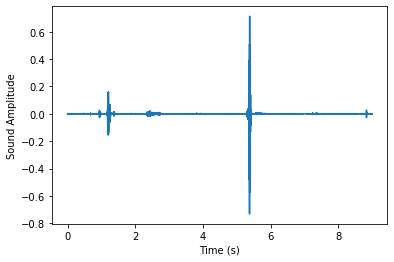

In [12]:
for file in range(0,1):
    audio, sfreq = lr.load(audio_files[file])
    time = np.arange(0, len(audio))/sfreq
    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')
    plt.show()
    

In [13]:
import IPython.display as ipd
ipd.Audio(y, rate=sfreq) 

In [14]:
audio, sfreq = lr.load(audio_files[4])
time = np.arange(0, len(audio))/sfreq
ipd.Audio(audio, rate=sfreq)

In [15]:
from pydub import AudioSegment
#from pydub.playback import play
music = AudioSegment.from_wav("trial.wav")
music=music+20
music.export('trial1.wav',format='wav')
#weight = 1.7

#data, fs = sf.read('myfile.wav')
#sd.play(data * weight, fs, blocking=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='trial1.wav'>

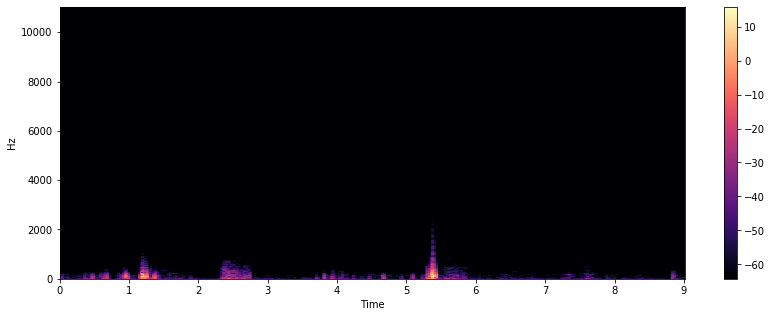

In [23]:
audio, sfreq = lr.load(audio_files[4])
X = lr.stft(y)
Xdb = lr.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
lr.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='hz')
plt.colorbar()

In [20]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, eps = 1e-14):

    max_freq = sample_rate
    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [21]:
specgram = spectrogram(y,sfreq)
specgram

array([[-32.21445491, -29.91874571, -23.51118347, ..., -28.83882548,
        -30.26852051, -30.51238057],
       [-30.85261317, -31.48948468, -23.11931277, ..., -27.82197475,
        -28.77080761, -29.95977286],
       [-29.51963895, -29.72275853, -23.84655641, ..., -29.00111099,
        -28.6215715 , -29.94879106],
       ...,
       [-32.2361913 , -32.2361913 , -32.2361913 , ..., -32.2361913 ,
        -32.2361913 , -32.2361913 ],
       [-32.2361913 , -32.2361913 , -32.2361913 , ..., -32.2361913 ,
        -32.2361913 , -32.2361913 ],
       [-32.2361913 , -32.2361913 , -32.2361913 , ..., -32.2361913 ,
        -32.2361913 , -32.2361913 ]])